<a href="https://colab.research.google.com/github/JYLeem/LA02/blob/main/ex_03_eigen_v.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

### < Eigen values & Eigen vectors of A > 
$ Au = λu $

In [4]:
A = np.array([[4,2], [1,3]]) # np.vstack([[4,2], [1,3]])
print("A:")
print(A, "\n")

e_values, e_vectors = npl.eig(A)
print("A의 교윳값= ", e_values)
print("A의 교유벡터= ", e_vectors)

# eigen vector u1, u2
u1 = np.vstack(e_vectors[:,0])
u2 = np.vstack(e_vectors[:,1])
print("u1: ", u1)
print("u2: ", u2)

# eigen value lambda1, lambda2
l1, l2 = e_values[0], e_values[1]
print("eigen values: ", l1, l2, "\n")

#check
print("Au1: ", np.dot(A, u1))
print("l1 * u1: ", l1 * u1)

print("Au2: ", np.dot(A, u2))
print("l2 * u2: ", l2 * u2)

A:
[[4 2]
 [1 3]] 

A의 교윳값=  [5. 2.]
A의 교유벡터=  [[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]
u1:  [[0.89442719]
 [0.4472136 ]]
u2:  [[-0.70710678]
 [ 0.70710678]]
eigen values:  5.0 2.0 

Au1:  [[4.47213595]
 [2.23606798]]
l1 * u1:  [[4.47213595]
 [2.23606798]]
Au2:  [[-1.41421356]
 [ 1.41421356]]
l2 * u2:  [[-1.41421356]
 [ 1.41421356]]


In [6]:
B = np.array([[5,2,0], [2,5,0], [-3,4,6]])
w2, V2 = np.linalg.eig(B)

print("\nB의 교윳값 = ", w2)
print("B의 교유백터 = ", V2)


B의 교윳값 =  [6. 7. 3.]
B의 교유백터 =  [[ 0.          0.57735027  0.36650833]
 [ 0.          0.57735027 -0.36650833]
 [ 1.          0.57735027  0.85518611]]


### PCA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [8]:
# iris 데이터의 위치 URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Pandas DataFrame으로 읽어드리기
df = pd.read_csv(url, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

nrow, ncol = df.shape
print("Iris data set :", nrow, "records with", ncol, "attributes\n")
print("First 5 records in iris data\n", df.head(5))
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values # 데이터의 속성값
y = df.loc[:, ['target']].values # 데이터의 부류
x = StandardScaler().fit_transform(x) # 평균 0, 분산 1인 데이터로 변환

Iris data set : 150 records with 5 attributes

First 5 records in iris data
    sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [10]:
pca = PCA(n_components = 2) # PCA를 적용하여 2개의 주성분만 추출
principalComponents = pca.fit_transform(x)

# 중선분 축 2개를 이용하여 2차원 데이터로 변환
print("\nFirst principal axis:", pca.components_[0])
print("Second principal axis:", pca.components_[1])

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal componenet 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

print("\nFirst 5 Transformed records\n", finalDf.head(5))



First principal axis: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Second principal axis: [0.37231836 0.92555649 0.02109478 0.06541577]

First 5 Transformed records
    principal component 1  principal componenet 2       target
0              -2.264542                0.505704  Iris-setosa
1              -2.086426               -0.655405  Iris-setosa
2              -2.367950               -0.318477  Iris-setosa
3              -2.304197               -0.575368  Iris-setosa
4              -2.388777                0.674767  Iris-setosa


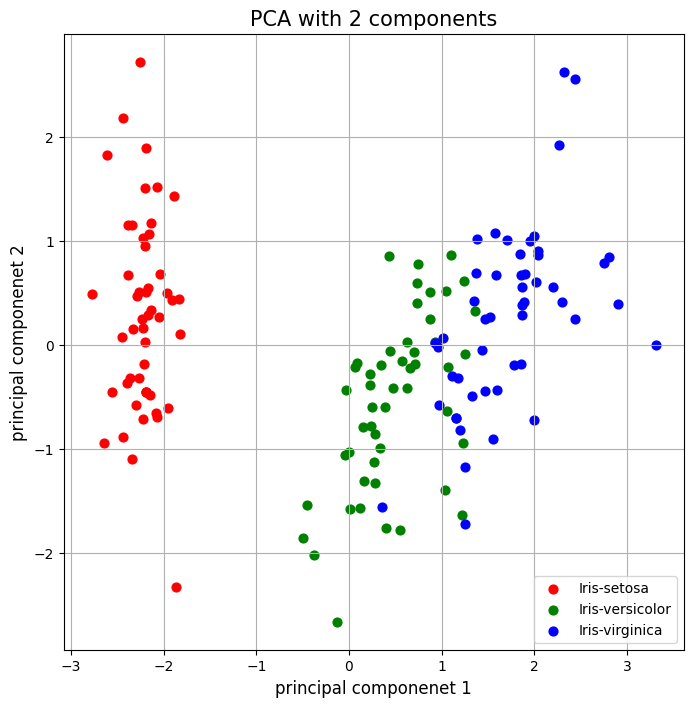

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal componenet 1', fontsize = 12)
ax.set_ylabel('principal componenet 2', fontsize = 12)
ax.set_title('PCA with 2 components', fontsize = 15)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # iris 데이터의 부류 이름
colors = ['r', 'g', 'b'] # 부류별로 지정된 색상

for target, color in zip(targets, colors):
  # target 에 해당하는 인덱스 가져오기
  indicesToKeep = finalDf['target'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
  , finalDf.loc[indicesToKeep, 'principal componenet 2'], c = color, s = 40)

ax.legend(targets)
ax.grid()
fig.show()